# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import json

import csv
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=10)
lngs = np.random.uniform(low=-180.000, high=180.000, size=10)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
pd.DataFrame(cities).head()


,0
0,ushuaia
1,cape town
2,pevek
3,matagami
4,butaritari


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

cloudiness = []
country = []
date = []
humidity = []
lat = []
lng =[]
max_temp = []
wind_speed = []

counter = 0
set_counter = 0


for city in cities:
    url = f"{base_url}q={city}&APPID={api_key}"
    try:
        weather = requests.get(url).json()

        

        cloudiness.append(weather['clouds']['all'])
        country.append(weather['sys']['country'])
        date.append(weather['dt'])
        humidity.append(weather['main']['humidity'])
        max_temp.append(weather['main']['temp_max'])
        wind_speed.append(weather['wind']['speed'])
        lat.append(weather['coord']['lat'])
        lng.append(weather['coord']['lon'])
    except:
        print(f'City not found')

    json.dumps(weather, indent = 4, sort_keys = False)
    
    if counter <50:
        counter +=1
    elif counter >=50:
        counter = 0
        set_counter +=1
    print(f"Weather data from {city.upper()} requested: city {counter} out of 49, from set {set_counter}")


Weather data from USHUAIA requested: city 1 out of 49, from set 0
Weather data from CAPE TOWN requested: city 2 out of 49, from set 0
Weather data from PEVEK requested: city 3 out of 49, from set 0
Weather data from MATAGAMI requested: city 4 out of 49, from set 0
Weather data from BUTARITARI requested: city 5 out of 49, from set 0
Weather data from POUM requested: city 6 out of 49, from set 0
Weather data from ARRAIAL DO CABO requested: city 7 out of 49, from set 0
Weather data from PUNTA ARENAS requested: city 8 out of 49, from set 0
Weather data from HERMANUS requested: city 9 out of 49, from set 0
City not found
Weather data from TAOLANARO requested: city 10 out of 49, from set 0


In [12]:
#Write extracted data into csv file
ls_zip = zip(cities, cloudiness, country, date, humidity, max_temp, wind_speed, lat, lng)

weather_df = pd.DataFrame(data = ls_zip)
weather_df = weather_df.rename(columns = {0:"Cities",
                                          1: "Cloudiness",
                                          2: "Country",
                                          3: "Date",
                                          4: "Humidity",
                                          5: "Max Temp",
                                          6: "Wind Speed",
                                          7: "Latitude",
                                          8: "Longitude"
                                         })
weather_df

,Cities,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed,Latitude,Longitude
0,ushuaia,0,AR,1571630054,70,279.150,2.60,-54.81,-68.31
1,cape town,40,ZA,1571630054,71,287.590,0.50,-33.93,18.42
2,pevek,98,RU,1571630055,72,270.808,5.71,69.70,170.27
3,matagami,100,NG,1571630055,95,293.318,1.21,9.67,8.40
4,butaritari,46,KI,1571630055,67,302.788,4.65,3.07,172.79
5,poum,20,MK,1571630125,87,280.150,1.50,41.28,20.71
6,arraial do cabo,77,BR,1571630125,70,294.018,4.90,-22.97,-42.02
7,punta arenas,0,CL,1571630126,75,278.150,7.70,-53.16,-70.91
8,hermanus,100,ZA,1571630126,68,288.150,1.34,-34.42,19.24


In [13]:
#Write data frame into csv file
weather_df.to_csv("draft_city_weather_data.csv",encoding = 'utf-8')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

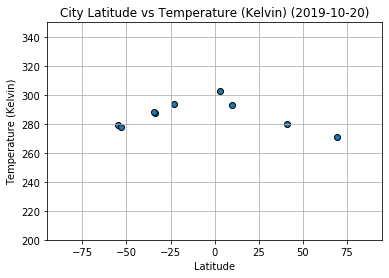

In [14]:
plt.scatter(lat, max_temp, edgecolors = 'k')
plt.xlabel("Latitude")
plt.ylabel("Temperature (Kelvin)")
plt.xlim(-95,95)
plt.ylim(200,350)

plt.grid()

plot_date = datetime.fromtimestamp(weather_df['Date'][0]).date()
plt.title(f"City Latitude vs Temperature (Kelvin) ({plot_date})")
plt.savefig ("test Latitude vs Temperature (Kelvin) Scatterplot.png")
plt.show()


#### Latitude vs. Humidity Plot

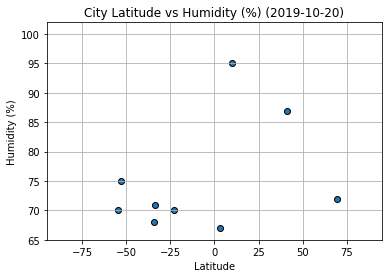

In [15]:
plt.scatter(lat, humidity, edgecolors = 'k')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-95,95)
plt.ylim(65,102)
plt.grid()

plot_date = datetime.fromtimestamp(weather_df['Date'][0]).date()
plt.title(f"City Latitude vs Humidity (%) ({plot_date})")
plt.show()

#### Latitude vs. Cloudiness Plot

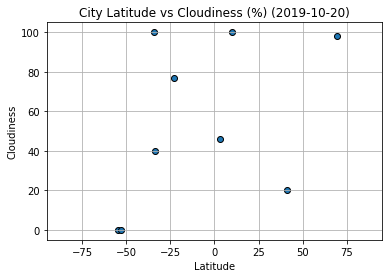

In [16]:
plt.scatter(lat, cloudiness, edgecolors = 'k')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(-95,95)

plt.grid()

plot_date = datetime.fromtimestamp(weather_df['Date'][0]).date()
plt.title(f"City Latitude vs Cloudiness (%) ({plot_date})")
plt.show()

#### Latitude vs. Wind Speed Plot

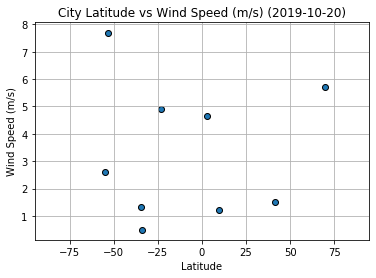

In [17]:
plt.scatter(lat, wind_speed, edgecolors = 'k')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.xlim(-95,95)

plt.grid()

plot_date = datetime.fromtimestamp(weather_df['Date'][0]).date()
plt.title(f"City Latitude vs Wind Speed (m/s) ({plot_date})")
plt.show()